## Subplot - Marine Heatwave 

Marine heatwave calculadas através de dados das Boias PIRATA 0°N 10°W E 0°N 23°W. Plot de mixed layer depth e termoclina e plot de temperatura da boia no período de estudo. Rotina de uso pessoal. 

Daniela Leite Corrêa

In [1]:
import numpy as np
import plotly.graph_objects as go

from datetime import date, timedelta, datetime
import time
import datetime

import progressbar
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cmocean
import xarray as xr
import pandas as pd
from netCDF4 import Dataset
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)
from tqdm import tqdm
import matplotlib.dates as mdates

import cartopy.feature as cfeature

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter

py.init_notebook_mode(connected=True)

C:\Users\Daniela\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [2]:
#xx = xr.open_dataset('/Users/Daniela/Documents/TRIATLAS/PIRATA/mhw_0n10_final.nc')
xx = xr.open_dataset('/Users/Daniela/Documents/TRIATLAS/PIRATA/0n23_MHW1.nc')

xx

<xarray.Dataset>
Dimensions:       (depth_t: 15, time: 8465)
Coordinates:
  * depth_t       (depth_t) float32 1.0 5.0 10.0 13.0 ... 180.0 300.0 500.0
  * time          (time) int32 729819 729820 729821 ... 738281 738282 738283
Data variables:
    sst           (time, depth_t) float32 ...
    sst_anom      (time, depth_t) float64 ...
    seas          (time, depth_t) float64 ...
    thresh        (time, depth_t) float64 ...
    mhw_category  (time, depth_t) int32 ...
Attributes:
    description:  MHW para profundidades da boia

In [3]:
time=xx.time
newtime=[datetime.datetime.fromordinal(int(time[i].data)) for i in range(len(time))] # criando o intervalo de tempo
xx =xx.assign(time=newtime)

In [4]:
#xx = xx.sel(time=slice('1999-1-1', '2021-12-31'),depth_t=slice(0,140))

In [14]:
#sst_original = xx.variables['sst_original'][:]  #[4280:4370,:]  on10 novembro de 2010  #4230:4290 nov 2010 para 0n23
                                                  #[8120:8210] 2021 para 0n23   #[8190:8250] 2021 para 0n10
time = xx.variables['time'][4230:4290]
seas2 = xx.variables['seas'][4230:4290,:]
depth2 = xx.variables['depth_t'][:]
sst2 = xx.variables['sst'][4230:4290,:]
sst_anom2 = xx.variables['sst_anom'][4230:4290,:]
thresh2 = xx.variables['thresh'][4230:4290,:]
mhw2 = xx.variables['mhw_category'][4230:4290,:]

In [15]:
sst2 = sst2.where(sst2>0)
thresh2 = thresh2.where(thresh2>0)

In [16]:
mhw_intensity = sst_anom2

# Plot Subplots

In [17]:
#time = xx.variables['time'][6420:6450]


In [18]:
#time = np.squeeze(time[100:500])


In [19]:
sst0 = np.zeros([len(time)])
sst6 = np.zeros([len(time)])
sst7 = np.zeros([len(time)])
sst8 = np.zeros([len(time)])
sst9 = np.zeros([len(time)])
sst10 = np.zeros([len(time)])
sst11 = np.zeros([len(time)])
thresh0 = np.zeros([len(time)])
thresh6 = np.zeros([len(time)])
thresh7 = np.zeros([len(time)])
thresh8 = np.zeros([len(time)])
thresh9 = np.zeros([len(time)])
thresh10 = np.zeros([len(time)])
thresh11 = np.zeros([len(time)])

mhw0 = np.zeros([len(time)])
mhw6 = np.zeros([len(time)])
mhw7 = np.zeros([len(time)])
mhw8 = np.zeros([len(time)])
mhw9 = np.zeros([len(time)])
mhw10 = np.zeros([len(time)])
mhw11 = np.zeros([len(time)])

seas0 = np.zeros([len(time)])
seas6 = np.zeros([len(time)])
seas7 = np.zeros([len(time)])
seas8 = np.zeros([len(time)])
seas9 = np.zeros([len(time)])
seas10 = np.zeros([len(time)])
seas11 = np.zeros([len(time)])

In [20]:
for yy in range(len(time)):
    sst0[yy] = np.squeeze(sst2[yy,0])
    thresh0[yy] = np.squeeze(thresh2[yy,0])
    mhw0[yy] = np.squeeze(mhw2[yy,0])
    seas0[yy] = np.squeeze(seas2[yy,0])

    sst6[yy] = np.squeeze(sst2[yy,6])
    thresh6[yy] = np.squeeze(thresh2[yy,6])
    mhw6[yy] = np.squeeze(mhw2[yy,6])
    seas6[yy] = np.squeeze(seas2[yy,6])


    sst7[yy] = np.squeeze(sst2[yy,7])
    thresh7[yy] = np.squeeze(thresh2[yy,7])
    mhw7[yy] = np.squeeze(mhw2[yy,7])
    seas7[yy] = np.squeeze(seas2[yy,7])


    sst8[yy] = np.squeeze(sst2[yy,8])
    thresh8[yy] = np.squeeze(thresh2[yy,8])
    mhw8[yy] = np.squeeze(mhw2[yy,8])
    seas8[yy] = np.squeeze(seas2[yy,8])


    sst9[yy] = np.squeeze(sst2[yy,9])
    thresh9[yy] = np.squeeze(thresh2[yy,9])
    mhw9[yy] = np.squeeze(mhw2[yy,9])
    seas9[yy] = np.squeeze(seas2[yy,9])
    
    sst10[yy] = np.squeeze(sst2[yy,10])
    thresh10[yy] = np.squeeze(thresh2[yy,10])
    mhw10[yy] = np.squeeze(mhw2[yy,10])
    seas10[yy] = np.squeeze(seas2[yy,10])
    
    sst11[yy] = np.squeeze(sst2[yy,11])
    thresh11[yy] = np.squeeze(thresh2[yy,11])
    mhw11[yy] = np.squeeze(mhw2[yy,11])
    seas11[yy] = np.squeeze(seas2[yy,11])
    
#print(yy)

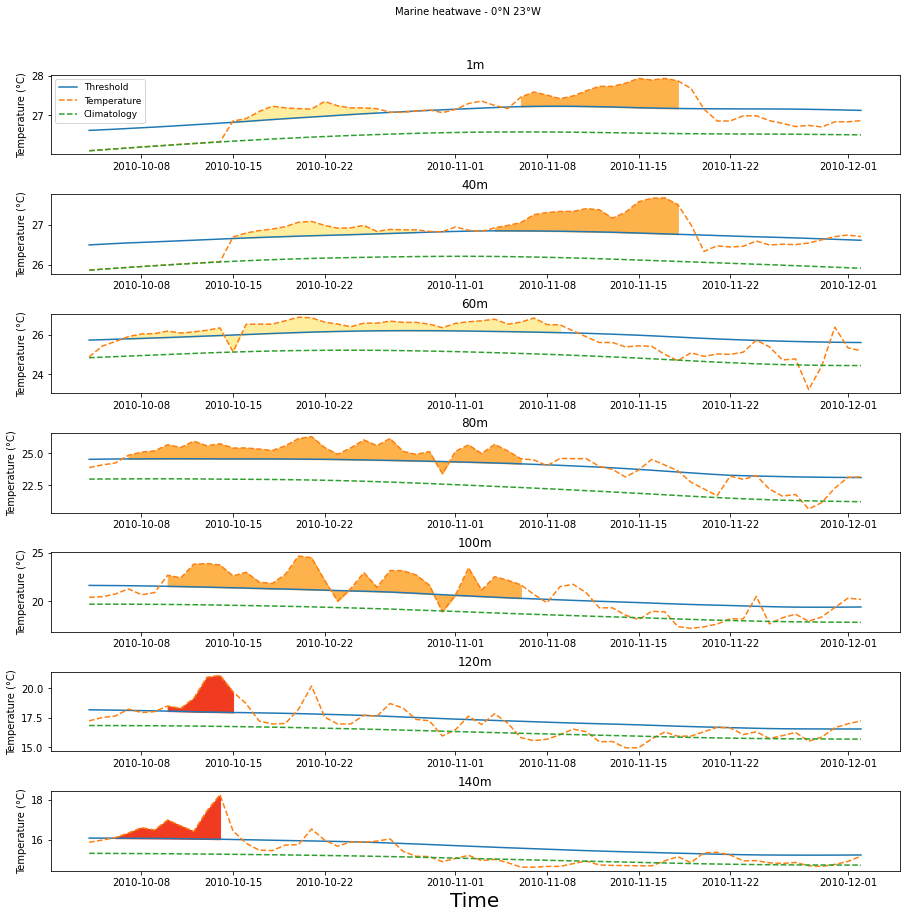

In [55]:
plt.rcParams["figure.figsize"] = (15,25)
plt.rcParams['axes.facecolor'] = 'white'

fig, (ax1, ax2, ax3, ax4, ax5,ax6,ax7) = plt.subplots(7)
fig.suptitle('Marine heatwave - 0°N 23°W', fontsize =10)
fig.tight_layout(pad=10.0)
#fig.suptitle('Marine heatwaves - 0N 23W')
#fig.tight_layout(pad=3.0)

ax1.plot(time,thresh0, '-', label='Threshold')
ax1.plot(time,sst0, '--', label='Temperature')
ax1.plot(time,seas0, '--', label='Climatology')
ax1.set_ylabel('Temperature (°C)', fontsize = 10)
ax1.set_title('1m')


ax1.fill_between (time, thresh0,sst0, where = (mhw0==1), color ='#ffeda0')
ax1.fill_between (time, thresh0,sst0, where = (mhw0==2), color ='#feb24c')
ax1.fill_between (time, thresh0,sst0, where = (mhw0==3), color ='#f03b20')
ax1.fill_between (time, thresh0,sst0, where = (mhw0==4), color ='#B30F0F')

ax1.legend(fontsize = 9)

plt.plot()

ax2.plot(time,thresh6, '-', label='threshold')
ax2.plot(time,sst6, '--', label='temperatura')
ax2.plot(time,seas6, '--', label='climatologia')
ax2.set_ylabel('Temperature (°C)', fontsize = 10)
ax2.set_title('40m')

#plt.plot(time,seas1, '-', label='climatologia')
#plt.plot(time,x, '-', label='climatologia')

ax2.fill_between (time, thresh6,sst6, where = (mhw6==1), color = '#ffeda0')
ax2.fill_between (time, thresh6,sst6, where = (mhw6==2), color ='#feb24c')
ax2.fill_between (time, thresh6,sst6, where = (mhw6==3), color ='#f03b20')
ax2.fill_between (time, thresh6,sst6, where = (mhw6==4), color ='#B30F0F')


#plt.legend()    
plt.plot()

    
ax3.plot(time,thresh7, '-', label='threshold')
ax3.plot(time,sst7, '--', label='temperatura')
ax3.plot(time,seas7, '--', label='climatologia')
ax3.set_ylabel('Temperature (°C)', fontsize = 10)
ax3.set_title('60m')

#plt.plot(time,seas1, '-', label='climatologia')
#plt.plot(time,x, '-', label='climatologia')

ax3.fill_between (time, thresh7,sst7, where = (mhw7==1), color ='#ffeda0')
ax3.fill_between (time, thresh7,sst7, where = (mhw7==2), color ='#feb24c')
ax3.fill_between (time, thresh7,sst7, where = (mhw7==3), color ='#f03b20')
ax3.fill_between (time, thresh7,sst7, where = (mhw7==4), color ='#B30F0F')


#plt.legend()
plt.plot()

ax4.plot(time,thresh8, '-', label='threshold')
ax4.plot(time,sst8, '--', label='temperatura')
ax4.plot(time,seas8, '--', label='climatologia')
ax4.set_ylabel('Temperature (°C)', fontsize = 10)
ax4.set_title('80m')

#plt.plot(time,seas1, '-', label='climatologia')
#plt.plot(time,x, '-', label='climatologia')

ax4.fill_between (time, thresh8,sst8, where = (mhw8==1), color ='#ffeda0')
ax4.fill_between (time, thresh8,sst8, where = (mhw8==2), color ='#feb24c')
ax4.fill_between (time, thresh8,sst8, where = (mhw8==3), color ='#f03b20')
ax4.fill_between (time, thresh8,sst8, where = (mhw8==4), color ='#B30F0F')
#plt.axis((x1,x2,15,25))

#plt.legend()
plt.plot()

ax5.plot(time,thresh9, '-', label='threshold')
ax5.plot(time,sst9, '--', label='temperatura')
ax5.plot(time,seas9, '--', label='climatologia')
ax5.set_ylabel('Temperature (°C)', fontsize = 10)
ax5.set_title('100m')
#ax5.set_xlabel('Time')



ax5.fill_between (time, thresh9,sst9, where = (mhw9==1), color ='#ffeda0')
ax5.fill_between (time, thresh9,sst9, where = (mhw9==2), color ='#feb24c')
ax5.fill_between (time, thresh9,sst9, where = (mhw9==3), color ='#f03b20')
ax5.fill_between (time, thresh9,sst9, where = (mhw9==4), color ='#B30F0F')


ax6.plot(time,thresh10, '-', label='threshold')
ax6.plot(time,sst10, '--', label='temperatura')
ax6.plot(time,seas10, '--', label='climatologia')
ax6.set_ylabel('Temperature (°C)', fontsize = 10)
ax6.set_title('120m')
#ax6.set_xlabel('Time')
#


ax6.fill_between (time, thresh10,sst10, where = (mhw10==1), color ='#ffeda0')
ax6.fill_between (time, thresh10,sst10, where = (mhw10==2), color ='#feb24c')
ax6.fill_between (time, thresh10,sst10, where = (mhw10==3), color ='#f03b20')
ax6.fill_between (time, thresh10,sst10, where = (mhw10==4), color ='#B30F0F')



ax7.plot(time,thresh11, '-', label='threshold')
ax7.plot(time,sst11, '--', label='temperatura')
ax7.plot(time,seas11, '--', label='climatologia')
ax7.set_ylabel('Temperature (°C)', fontsize = 10)
ax7.set_title('140m')
ax7.set_xlabel('Time', fontsize = 20 )



ax7.fill_between (time, thresh11,sst11, where = (mhw11==1), color ='#ffeda0')
ax7.fill_between (time, thresh11,sst11, where = (mhw11==2), color ='#feb24c')
ax7.fill_between (time, thresh11,sst11, where = (mhw11==3), color ='#f03b20')
ax7.fill_between (time, thresh11,sst11, where = (mhw11==4), color ='#B30F0F')



#ax1,ax2,y1,y2 = plt.axis()
#ax1,ax2,y1,y2 = plt.axis()

plt.subplots_adjust(bottom=0.5, 
                    wspace=0.5, 
                    hspace=0.5)
#plt.axis((ax1,ax2,13,17))
#plt.title('0N 23w - 180m', fontsize=18)
#plt.xlabel('Time', fontsize=18)
#plt.ylabel('Temperature', fontsize=18)
#plt.legend()
#fig.tight_layout(pad=5.0)
plt.show()


## Count MHW

In [57]:
y = np.array(mhw0)
lista = y.tolist()
print(lista.count(1))
print(lista.count(2))
print(lista.count(3))
print(lista.count(4))

12
13
0
0


In [58]:
y = np.array(mhw6) #40 metros
lista = y.tolist()
print(lista.count(1))
print(lista.count(2))
print(lista.count(3))
print(lista.count(4))

15
15
0
0


In [59]:
y = np.array(mhw7) #60 metros
lista = y.tolist()
print(lista.count(1))
print(lista.count(2))
print(lista.count(3))
print(lista.count(4))

34
0
0
0


In [60]:
y = np.array(mhw8) #80 metros
lista = y.tolist()
print(lista.count(1))
print(lista.count(2))
print(lista.count(3))
print(lista.count(4))

0
31
0
0


In [61]:
y = np.array(mhw9) #100 metros
lista = y.tolist()
print(lista.count(1))
print(lista.count(2))
print(lista.count(3))
print(lista.count(4))

0
28
0
0


In [36]:
y = np.array(mhw10) #120 metros
lista = y.tolist()
print(lista.count(1))
print(lista.count(2))
print(lista.count(3))
print(lista.count(4))

0

In [62]:
y = np.array(mhw11) #140 metros
lista = y.tolist()
print(lista.count(1))
print(lista.count(2))
print(lista.count(3))
print(lista.count(4))

0
0
9
0


# Plot figures

# MHW intensity

In [63]:
sst_anom2 = xx.variables['sst_anom'][:]
mhw2 = xx.variables['mhw_category'][:]
time = xx.variables['time'][:]
depth2 = xx.variables['depth_t'][:]
#sst_original = xx.variables['sst_original'][:]
sst2 = xx.variables['sst'][:]


In [64]:
sst2 = sst2.where(sst2>0)
#thresh2 = thresh2.where(thresh2>0)

In [65]:
sst2

<xarray.Variable (time: 8465, depth_t: 15)>
array([[28.22    , 28.09843 , 27.909842, ..., 13.26    , 10.42    ,
         6.86    ],
       [28.35    , 28.12054 , 27.931547, ..., 13.26    , 10.84    ,
         6.93    ],
       [28.07    , 28.14241 , 27.953743, ..., 13.25    , 10.3     ,
         7.03    ],
       ...,
       [28.94    , 28.92    , 28.86    , ..., 13.66    , 11.25    ,
         7.39    ],
       [28.86    , 28.81    , 28.71    , ..., 13.71    , 11.49    ,
         7.42    ],
       [28.52    , 28.51    , 28.48    , ..., 13.7     , 11.39    ,
         7.41    ]], dtype=float32)

In [66]:
mhw_intensity = sst_anom2
mhw_intensity = mhw_intensity.where(mhw2>0)



In [67]:
mhw0 = np.squeeze(mhw2[:,0])
mhw6 = np.squeeze(mhw2[:,6])
mhw7 = np.squeeze(mhw2[:,7])
mhw8 = np.squeeze(mhw2[:,8])
mhw9 = np.squeeze(mhw2[:,9])
mhw10 = np.squeeze(mhw2[:,10])
mhw11 = np.squeeze(mhw2[:,11])

sst0 = np.squeeze(sst_anom2[:,0])
sst6 = np.squeeze(sst_anom2[:,6])
sst7 = np.squeeze(sst_anom2[:,7])
sst8 = np.squeeze(sst_anom2[:,8])
sst9 = np.squeeze(sst_anom2[:,9])
sst10 = np.squeeze(sst_anom2[:,10])
sst11 = np.squeeze(sst_anom2[:,11])






In [68]:
mhw_intensity0 = sst0
mhw_intensity6 = sst6
mhw_intensity7 = sst7
mhw_intensity8 = sst8
mhw_intensity9 = sst9
mhw_intensity10 = sst10
mhw_intensity11 = sst11

In [69]:
mhw_intensity0 = mhw_intensity0.where(mhw0>0)
mhw_intensity6 = mhw_intensity6.where(mhw6>0)
mhw_intensity7 = mhw_intensity7.where(mhw7>0)
mhw_intensity8 = mhw_intensity8.where(mhw8>0)
mhw_intensity9 = mhw_intensity9.where(mhw9>0)
mhw_intensity10 = mhw_intensity10.where(mhw10>0)
mhw_intensity11 = mhw_intensity11.where(mhw11>0)

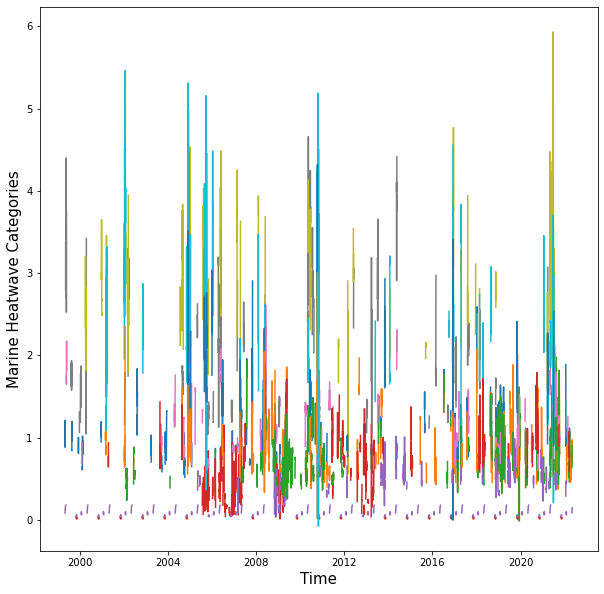

In [74]:
plt.figure(figsize = (10,10))
plt.plot(time,mhw_intensity)
plt.ylabel('Marine Heatwave Categories', fontsize=15)
plt.xlabel('Time', fontsize=15)

plt.show()

# Mixed Layer Depth

In [113]:
buoy = xr.open_dataset('/Users/Daniela/Documents/TRIATLAS/PIRATA/foltz/other_0n10w_daily.nc')
#buoy

In [114]:
buoy= buoy.isel(depth=[0,8,12,16,20,24,28])

In [115]:
buoy

<xarray.Dataset>
Dimensions:       (depth: 7, time: 9100)
Dimensions without coordinates: depth, time
Data variables:
    time1         (time) datetime64[ns] ...
    depth1        (depth) float64 ...
    airt          (time) float64 ...
    airt_error    (time) float64 ...
    airt_flag     (time) float64 ...
    rh            (time) float64 ...
    rh_error      (time) float64 ...
    rh_flag       (time) float64 ...
    ws            (time) float64 ...
    ws_error      (time) float64 ...
    ws_flag       (time) float64 ...
    wu            (time) float64 ...
    wu_error      (time) float64 ...
    wu_flag       (time) float64 ...
    wv            (time) float64 ...
    wv_error      (time) float64 ...
    wv_flag       (time) float64 ...
    ild           (time) float64 ...
    ild_error     (time) float64 ...
    ild_flag      (time) float64 ...
    mld           (time) float64 ...
    mld_error     (time) float64 ...
    mld_flag      (time) float64 ...
    z20           (time) float64 ...
    z20_error     (time) float64 ...
    z20_flag      (time) float64 ...
    tave          (time) float64 ...
    tave_error    (time) float64 ...
    tave_flag     (time) float64 ...
    uh            (time) float64 ...
    uh_error      (time) float64 ...
    uh_flag       (time) float64 ...
    vh            (time) float64 ...
    vh_error      (time) float64 ...
    vh_flag       (time) float64 ...
    dsstdx        (time) float64 ...
    dsstdx_error  (time) float64 ...
    dsstdx_flag   (time) float64 ...
    dsstdy        (time) float64 ...
    dsstdy_error  (time) float64 ...
    dsstdy_flag   (time) float64 ...
    swr           (time) float64 ...
    swr_error     (time) float64 ...
    swr_flag      (time) float64 ...
    u10m          (time) float64 ...
    u10m_error    (time) float64 ...
    u10m_flag     (time) float64 ...
    v10m          (time) float64 ...
    v10m_error    (time) float64 ...
    v10m_flag     (time) float64 ...
    temp          (time, depth) float64 ...
    temp_error    (time, depth) float64 ...
    temp_flag     (time, depth) float64 ...
    sal           (time, depth) float64 ...
    sal_error     (time, depth) float64 ...
    sal_flag      (time, depth) float64 ...
Attributes:
    Summary:  Enhanced PIRATA data set, created from the original daily PIRAT...

In [116]:
time = buoy.variables['time1'][794:]  #2922:6575
depth = buoy.variables['depth1'][:]
mld = buoy.variables['mld'][794:]
z20 = buoy.variables['z20'][794:]

In [117]:
xx = xx.sel(time=slice('1999-3-6', '2021-11-30'))

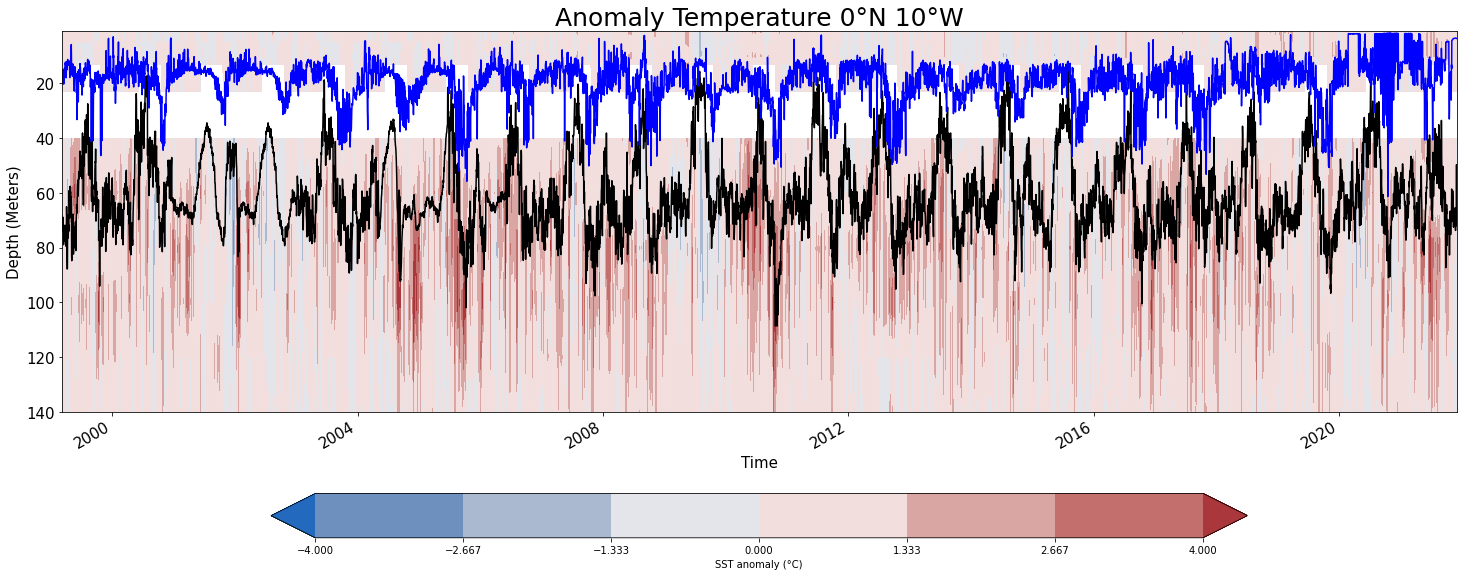

<Figure size 1080x1800 with 0 Axes>

In [125]:
plt.figure(figsize=(25,10))
xx = xx.sel(depth_t=slice(0,140))
#plt.style.use('ggplot')
levels = np.linspace(-4,4,7)
manual_locations = [(20)] 

cs = xx.sst_anom.T.plot.contourf(cmap='vlag',levels=levels, extend= "both",vmax=30, vmin=0,
                                 cbar_kwargs={"orientation": "horizontal","label":"SST anomaly (°C)", "shrink": 0.7},robust=True) #RdBu_r'
#cs2 = xx.sst.T.plot.contour(colors=('k'), levels = manual_locations)
cs2 = plt.plot(time,z20,'k')  #MLD
cs3 = plt.plot(time,mld,'b-') #Termocline
#cs2 = buoy.temperature.T.plot.contour(colors=('w'), levels=cs.levels[::4])
#plt.gca().clabel(cs2, fmt='%2.1f', colors='w', fontsize=10)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Depth (Meters)', fontsize=15)
plt.title('Anomaly Temperature 0°N 10°W',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#cbar = plt.colorbar(cs)
#bar = plt.colorbar(cs, ticks=[-3,2,1 0,1,2, 3])
cbar.ax.tick_params(labelsize=15) 

plt.gca().invert_yaxis()
plt.show()

plt.savefig('mhw.jpeg')

## Temperature 


In [601]:
xx = xr.open_dataset('http://goosbrasil.org:8080/pirata/B0n10w.nc')


In [311]:
xx = xx.where(xx>0)

In [312]:
#xx = xx.sel(time=slice('2010-5-1', '2011-5-1'),depth_t=slice(0,180))
xx = xx.sel(time=slice('2010-5-1', '2011-5-1'),depth_t=slice(0,140))

In [313]:
xx = xx.isel(depth_t=[0,6,7,8,9,10]) #para temperatura 
#xx = xx.isel(depth_t=[0,1,2,3,8,9,10,11,12])  #para salinidade 

In [315]:
climatology = xx.groupby("time.dayofyear").mean('time')
anomalies = xx.groupby("time.dayofyear") - climatology

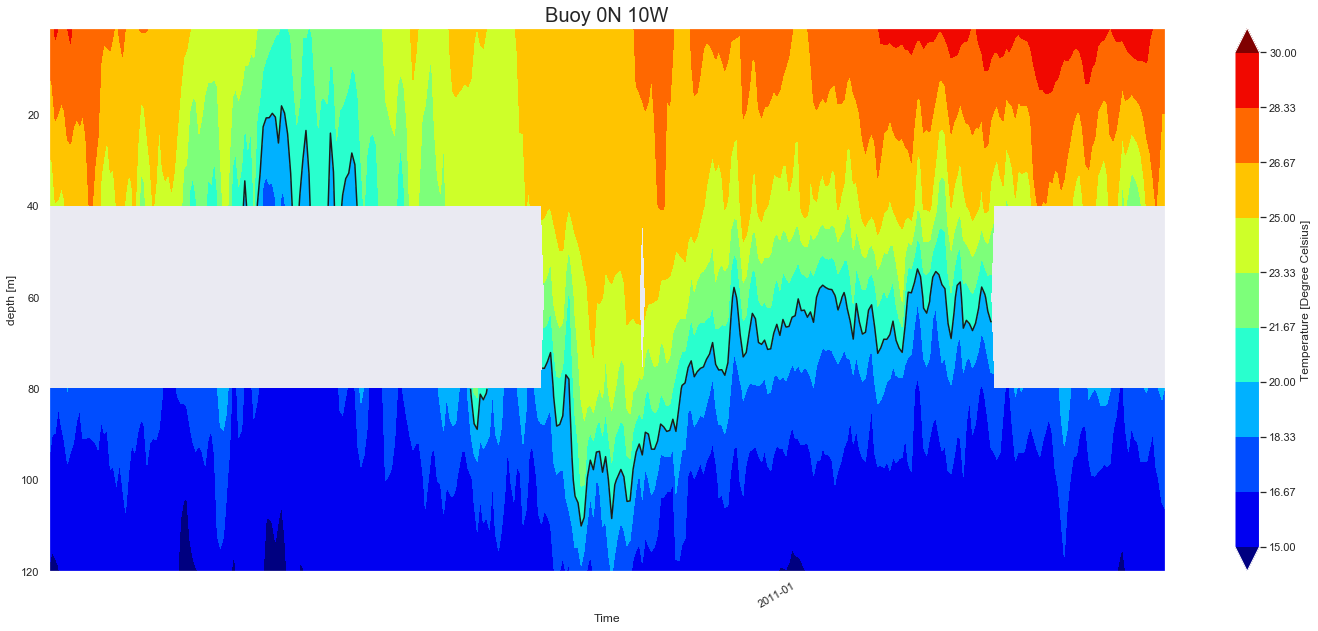

In [314]:
plt.figure(figsize=(25,10))
#xx = xx.sel(depth_t=slice(0,200))
#plt.style.use('ggplot')
levels = np.linspace(15,30,10)
manual_locations = [(20)] 
cs = xx.temperature.T.plot.contourf(cmap='jet',levels=levels, extend= "both",vmax=30, vmin=0)
cs2 = xx.temperature.T.plot.contour(colors=('k'), levels = manual_locations)



plt.grid(axis = 'y')

#cs2 = buoy.temperature.T.plot.contour(colors=('w'), levels=cs.levels[::4])
#plt.gca().clabel(cs2, fmt='%2.1f', colors='w', fontsize=10)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1,month=1,day=1))  #para cada ano
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=None, bymonthday=1, interval=1, tz=None))
plt.title('Buoy 0N 10W', fontsize =20)
plt.gca().invert_yaxis()
plt.show()